# <span style="color:blue"> Esercitazione 03 </span>

#### NOTA PER IL LETTORE:
La struttura che ho scelto di dare a questo documento e di tutti gli altri è la seguente. </p>
Il documento è diviso in più sezioni, ciascuna tipicamente dedicata a un esercizio. Ogni sezione consta di tre sottosezioni: </p>
- una breve sintesi dello scopo e degli obiettivi dell'esercizio ;
- la descrizione del codice implementato ;
- la graficazione dei risultati ottenuti con relativa analisi dati.

## <span style="color:blue"> Esercizio 1 
(code BlackScholes.cpp)


### Scopo dell'esercizio

La richiesta dell'esercizio 1 è quella di utilizzare un metodo Monte Carlo per simulare il costo iniziale di una opzione europea e di confrontare il risultato ottenuto per un'opzione di tipo *call* e *put* con i risultati esatti della teoria di *Black-Scholes*. Il calcolo del costo deve essere svolto in due modi:
- campionando direttamente il prezzo finale $S(T)$</span> per un $GBM(r,\sigma^2)$ ;
- campionando l'evoluzione temporale del prezzo $S(t)$, dividendo l'intervallo $[0,T]$ in 100 sottointervalli. 
<p>

I valori dei parametri in gioco sono stati forniti nella traccia:
- asset price a $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- tasso di interesse risk-free: $r=0.1$
- volatilità: $\sigma=0.25$

### Descrizione del codice

Entrambi i metodi da implementare richiedono il campionamento di un **moto browniano geometrico** $GBM(r, \sigma^2)$, dove $r$ è il tasso di interesse senza rischio e $\sigma$ la volatilità. Ricordando la formula
$$S(t)=S(0) e^{\bigl(r- \frac{\sigma^2}{2}\bigr)t + \sigma W(t)}$$  e, inoltre, che il campionamento di un moto browniano standard W(t) può essere fatto generando variabili casuali distribuite in modo normale standard $Z_i \sim N(0,1)$ :
$$W(t_{i+1})= W(t_i)+ Z_{i+1} \sqrt{t_{i+1}-t_i} ,$$
è stato possibile implementare i due metodi nel seguente modo.
1. Per svolgere la simulazione si è implementato un metodo a blocchi, producendo $M=10^4$ realizzazioni divise in $N=100$ blocchi.
2. Sono state generate variabili casuali normali standard con tecnica *Box Muller*. Per il primo metodo sono state generati $10^4$ numeri casuali. D'altro canto, poichè il secondo metodo richede una discretizzazione dell'evoluzione del prezzo in 100 step, sono state generate $10^6$ variabili gaussiane, riempiendo ripetutamente $M$ volte un array da 100 entrate. 
3. **Primo metodo:** Per ogni realizzazione $i=1,...,M$ si è calcolato il valore del prezzo finale $S_i(T)=S(0) e^{\bigl(r- \frac{\sigma^2}{2}\bigr)T + \sigma Z_i \sqrt{T}}$ e il corrispondente costo dell'opzione iniziale: <p>
$C_i^{CALL}= e^{-rT} \max [0, S_i(T)-K]$ nel caso **call** ; <p>
$C_i^{PUT}= e^{-rT} \max [0, K - S_i(T)]$ nel caso **put** . <p>
Raggruppando questi dati negli $N$ blocchi, si è ottenuta una stima del costo (e del costo quadro) per ogni blocco come media aritmetica e, utilizzando la solita procedura, si sono calcolate e graficate le somme cumulate con relativa incertezza. <p>
**Secondo metodo:** Per ogni realizzazione $i$ si è seguita l'evoluzione temporale del prezzo $S(t)$ dal tempo $0$ al tempo $T$, calcolando $S_i(t_{j+1})=S_i(t_j) e^{\bigl(r- \frac{\sigma^2}{2}\bigr)(t_{j+1}-t_j) + \sigma Z_{j+1} \sqrt{t_{j+1}-t_j}}$ (con $t_j= \frac{j}{100}, j=0, ..., 99$). Si è posto $S_i(T)=S_i(t_{100})$ e, dopo di che, si è proceduto identicamente a prima per la stima dei costi iniziali delle opzioni.

### Analisi dati

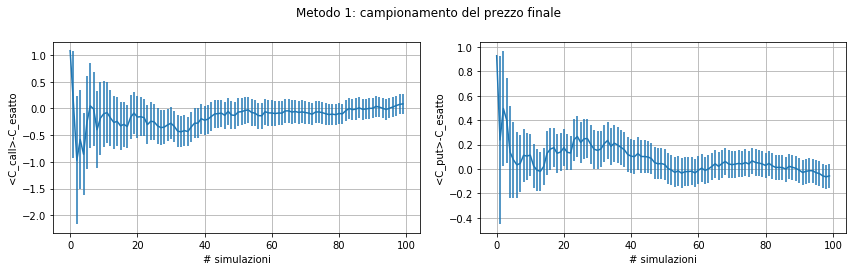

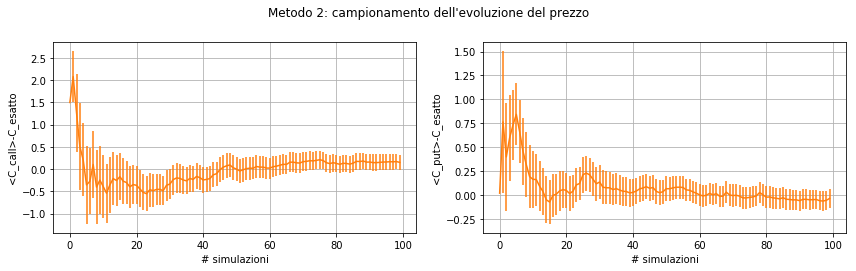

In [2]:
%matplotlib inline
from numpy import *
from math import *
import matplotlib
import matplotlib.pyplot as plt

#----METODO 1----#
graph = genfromtxt('Metodo1.dat')

fig = plt.figure(figsize=(12, 3.8))
fig.suptitle('Metodo 1: campionamento del prezzo finale')

ax = fig.add_subplot(121)
ax.errorbar(graph[:,0],graph[:,1]-14.975790778311286, yerr=graph[:,2])
ax.set_xlabel('# simulazioni')
ax.set_ylabel('<C_call>-C_esatto')
ax.grid(True)

ax = fig.add_subplot(122)
ax.errorbar(graph[:,0],graph[:,3]-5.4595325819072364, yerr=graph[:,4])
ax.set_xlabel('# simulazioni')
ax.set_ylabel('<C_put>-C_esatto')
ax.grid(True)

plt.tight_layout()
fig.subplots_adjust(top=0.85)
plt.show()

#----METODO 2----#
graph = genfromtxt('Metodo2.dat')

fig = plt.figure(figsize=(12, 3.8))
fig.suptitle("Metodo 2: campionamento dell'evoluzione del prezzo")

ax = fig.add_subplot(121)
ax.errorbar(graph[:,0],graph[:,1]-14.975790778311286, yerr=graph[:,2], color='C1')
ax.set_xlabel('# simulazioni')
ax.set_ylabel('<C_call>-C_esatto')
ax.grid(True)

ax = fig.add_subplot(122)
ax.errorbar(graph[:,0],graph[:,3]-5.4595325819072364, yerr=graph[:,4], color='C1')
ax.set_xlabel('# simulazioni')
ax.set_ylabel('<C_put>-C_esatto')
ax.grid(True)

plt.tight_layout()
fig.subplots_adjust(top=0.85)
plt.show()

I risultati ottenuti nei quattro casi mostrano un buon comportamento dell'algoritmo implementato.